<a href="https://colab.research.google.com/github/lolddong/data_analysis/blob/main/22_IMDB_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB LSTM

## 1. 패키지 준비하기

In [2]:
import helper

import seaborn as sb
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# 토큰화 패키지
from tensorflow.keras.preprocessing.text import Tokenizer
# 문장 길이를 통일 시키는 용도
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 2. 데이터셋 준비하기

In [3]:
# 가장 빈번하게 사용되는 단어의 갯수
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_test.shape} 레이블 {y_test.shape}')

17464789/17464789 [==============================] - 2s 0us/step
훈련 데이터 (25000,) 레이블 (25000,)
검증 데이터 (25000,) 레이블 (25000,)


## 3. 데이터 전처리
### 1) 데이터를 동일한 길이로 맞추기 (padding)

In [4]:
# 최대 문장 길이
max_len = 500
print('Before pad_sequences: ', len(x_train[0]), len(x_train[1]))
pad_x_train = pad_sequences(x_train, maxlen = max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding='pre')

# 원래 단어의 앞에 '지정해 준 단어의 길이 - 원래 단어의 길이' (500-218)만큼 0이 추가된 것을 볼 수 있다
print('After pad_sequences: ', len(pad_x_train[0]), len(pad_x_train[1]))

print(pad_x_train[0])

Before pad_sequences:  218 189
After pad_sequences:  500 500
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 

In [ ]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## 4. 데이터셋 분할하기
- 이미 데이터셋이 훈련데이터와 검증데이터로 분리되어 있기에 별도의 분할 작업을 수행할 필요 없음


## 5. 모델 개발
### 1) 모델 정의 (LSTM)

In [6]:
my_model = Sequential()

my_model.add(Embedding(input_dim = num_words,
                       output_dim = 32,
                       input_length = max_len))

my_model.add(LSTM(32,
                  return_sequences=True,
                  dropout=0.15,
                  recurrent_dropout=0.15))
my_model.add(LSTM(16))
my_model.add(Dense(1, activation = 'sigmoid'))

# 결국은 긍정, 부정 여부를 판단하는 것이므로 이진분류분석에 속한다
my_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 500, 32)           8320      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 331473 (1.26 MB)
Trainable params: 331473 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2) 학습하기

In [ ]:
result = my_model.fit(pad_x_train,
                      y_train,
                      epochs=500,
                      validation_data=(pad_x_test,
                                       y_test),
                      callbacks=[EarlyStopping(monitor='val_loss',
                                               patience=5,
                                               verbose=1),
                                 ReduceLROnPlateau(monitor = 'val_loss',
                                                   patience = 3,
                                                   factor = 0.5,
                                                   min_lr=0.0001,
                                                   verbose=1)])

Epoch 1/500
782/782 [==============================] - 1864s 2s/step - loss: 0.4235 - acc: 0.8038 - val_loss: 0.7275 - val_acc: 0.5712 - lr: 0.0010
Epoch 2/500
782/782 [==============================] - 1778s 2s/step - loss: 0.3476 - acc: 0.8566 - val_loss: 0.3236 - val_acc: 0.8685 - lr: 0.0010
Epoch 3/500
782/782 [==============================] - 1720s 2s/step - loss: 0.2296 - acc: 0.9134 - val_loss: 0.3279 - val_acc: 0.8773 - lr: 0.0010
Epoch 4/500
416/782 [==============>...............] - ETA: 12:37 - loss: 0.1740 - acc: 0.9386

## 6. 학습 결과 평가

In [ ]:
# 강사님 helper 코드
# helper.tf_result_plot(result)

# evaluate1 = my_model.evaluate(pad_x_train, y_train)
# print('최종 훈련 손실률: %f, 최종 훈련 정확도: %f' % (evaluate1[0], evaluate1[1]))
# evaluate2 = my_model.evaluare(pad_x_test, y_test)
# print('최종 검증 손슬률: %f, 최종 검증 정확도: %f' % (evaluate2[0], evaluate2[1]))

In [ ]:
# 학습 결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace = True)
result_df

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.419994,0.80144,0.284930,0.87924,0.0010
2,0.190721,0.93000,0.303743,0.87168,0.0010
3,0.103594,0.97012,0.295261,0.88252,0.0010
4,0.049804,0.98988,0.322961,0.87756,0.0010
5,0.021444,0.99844,0.336996,0.87724,0.0005
6,0.014315,0.99924,0.355815,0.87596,0.0005


In [ ]:
# Colab 그래프 한글글꼴 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm-/.cache/matplotlib -rf

from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

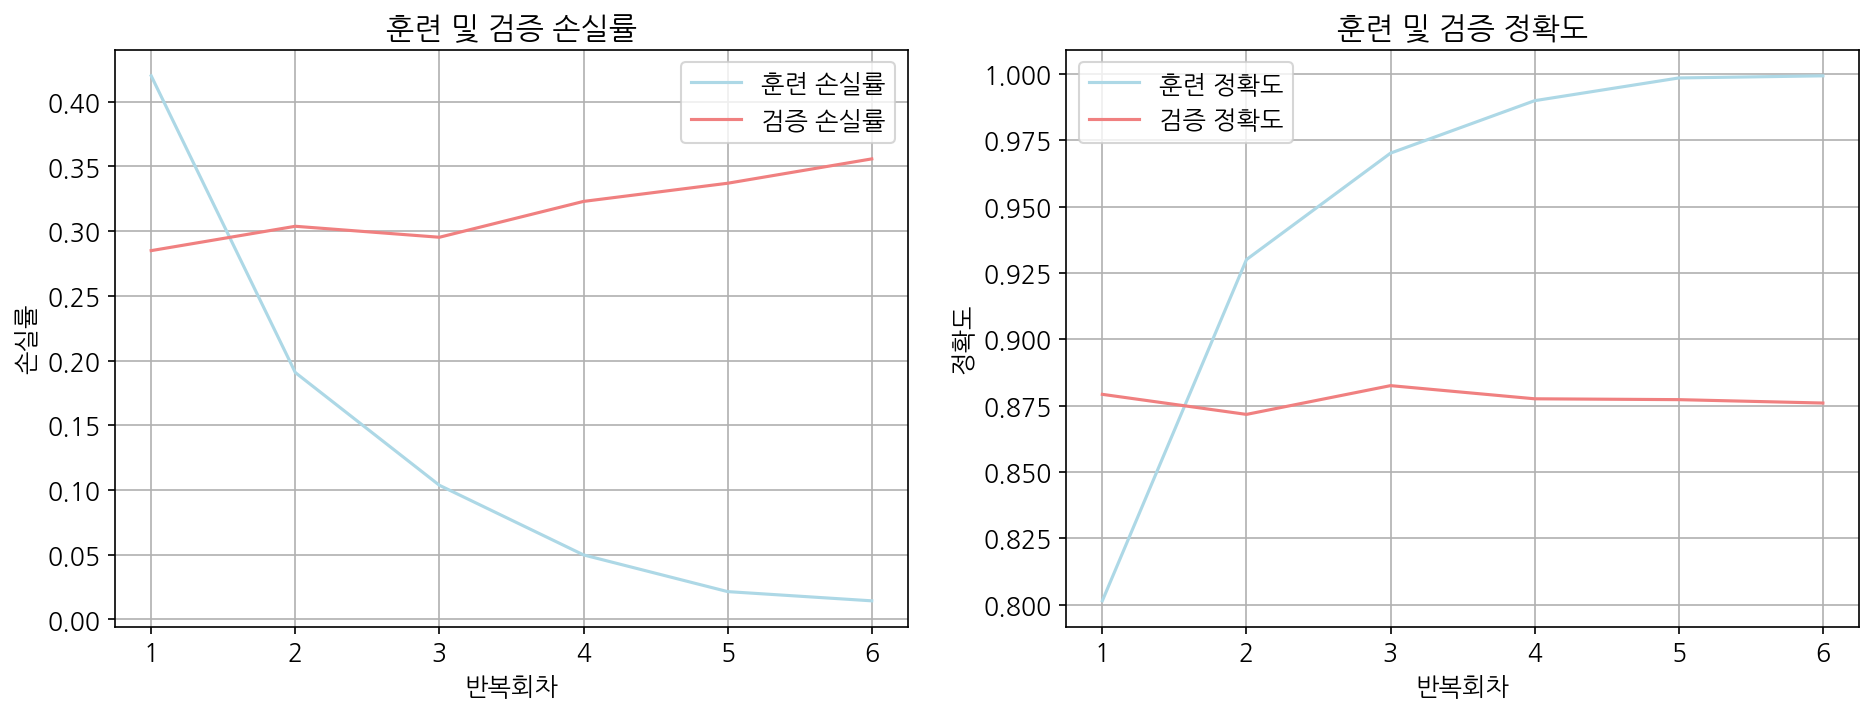

In [ ]:
# 그래프 기본설정
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
sb.lineplot(x=result_df.index,
            y='loss',
            data=result_df,
            color='lightblue',
            label='훈련 손실률',
            ax=ax1)
sb.lineplot(x=result_df.index,
            y='val_loss',
            data=result_df,
            color='lightcoral',
            label='검증 손실률',
            ax = ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 정확도 그리기
sb.lineplot(x=result_df.index,
            y='acc',
            data=result_df,
            color='lightblue',
            label='훈련 정확도',
            ax=ax2)
sb.lineplot(x=result_df.index,
            y='val_acc',
            data=result_df,
            color='lightcoral',
            label='검증 정확도',
            ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [ ]:
evaluate1 = my_model.evaluate(pad_x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 정확도: %f' % (evaluate1[0], evaluate1[1]))
evaluate2 = my_model.evaluate(pad_x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 정확도: %f' % (evaluate2[0], evaluate2[1]))

782/782 [==============================] - 3s 3ms/step - loss: 0.0099 - acc: 0.9998
최종 훈련 손실률: 0.009878, 최종 훈련 정확도: 0.999760
782/782 [==============================] - 2s 3ms/step - loss: 0.3558 - acc: 0.8760
최종 검증 손실률: 0.355815, 최종 검증 정확도: 0.875960


## 7. 학습 결과 적용
### 1) 훈련 데이터에 대한 예측 결과 산정

In [ ]:
pred = my_model.predict(pad_x_train)
data_count, case_count = result.shape
print('%d개의 훈련 데이터가 %d개의 경우의 수를 갖는다' % (data_count, case_count))
pred

782/782 [==============================] - 1s 2ms/step
25000개의 훈련 데이터가 1개의 경우의 수를 갖는다.


array([[9.9994695e-01],
       [7.3807947e-05],
       [9.8995897e-06],
       ...,
       [3.8229558e-04],
       [9.9990201e-01],
       [3.0391457e-02]], dtype=float32)

### 2) 예측 결과를 1차원 배열로 변환

In [ ]:
f_pred = pred.flatten()
f_pred

array([9.9994695e-01, 7.3807947e-05, 9.8995897e-06, ..., 3.8229558e-04,
       9.9990201e-01, 3.0391457e-02], dtype=float32)

### 3) 실제 결과값과 머신러닝에 의한 예측값 비교

In [ ]:
kdf = DataFrame({
    'train': y_train,
    'pred': np.round(f_pred)
})

kdf['pred'] = kdf['pred'].astype('int')

cm = confusion_matrix(kdf['train'], kdf['pred'])
plt.figure(figsize=(7, 3))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Result')
plt.show()
plt.close

,train,pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
24995,1,1
24996,0,0
24997,0,0
24998,1,1


### 4) 실제 결과값과 머신러닝에 의한 예측값 비교 - 오차행렬 확인

In [ ]:
# 예측 데이터(ca_y_test)를 x축으로, 결과 데이터(results)를 y축으로 놓는
# 오차행렬(confusion_matrix) 생성하기
cm = confusion_matrix(kdf['train'], kdf['pred'])
cmdf1 = DataFrame(cm)
cmdf1

,0,1
0,12496,4
1,2,12498


### 5) 오차행렬 히트맵으로 확인

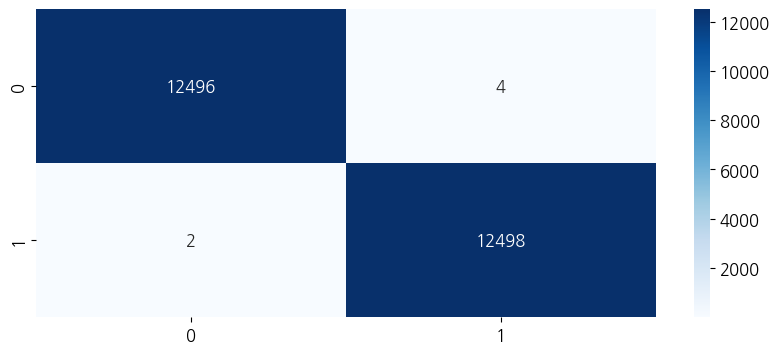

In [ ]:
plt.figure(figsize = (10, 4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
plt.close()

### 6) 검증 데이터에 대한 결과

782/782 [==============================] - 1s 2ms/step


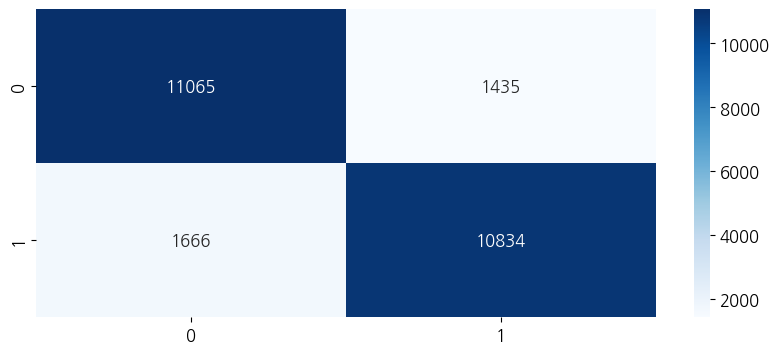

In [ ]:
t_results = my_model.predict(pad_x_test).flatten()
tdf = DataFrame({
    'test': y_test,
    'pred': np.round(t_results)
})
tdf['pred'] = tdf['pred'].astype('int')
cmdf = confusion_matrix(tdf['test'], tdf['pred'])

plt.figure(figsize=(10, 4))
sb.heatmap(cmdf, annot=True, fmt='d', cmap='Blues')
plt.show()
plt.close()